# Explore here

### Paso 2: Visualiza la información de entrada


Como primer paso visualizo las primeras 9 fotos de perros y las primeras 9 fotos de gatos.

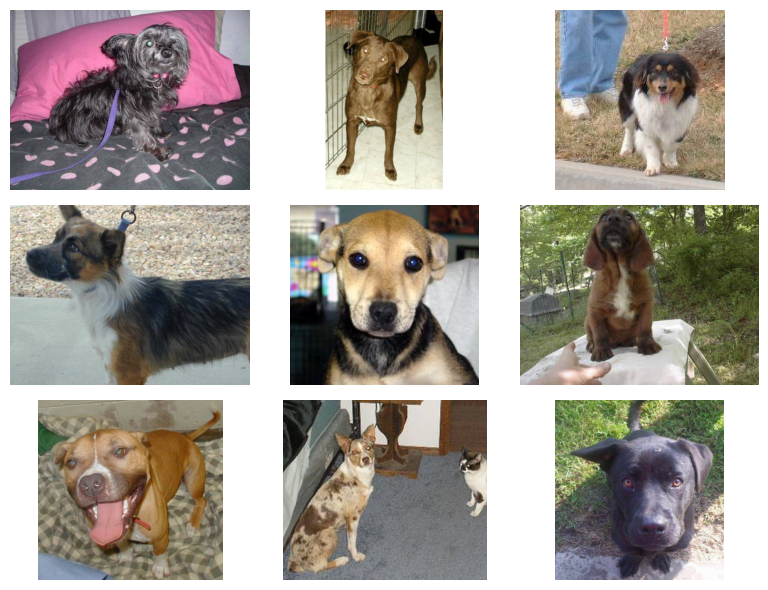

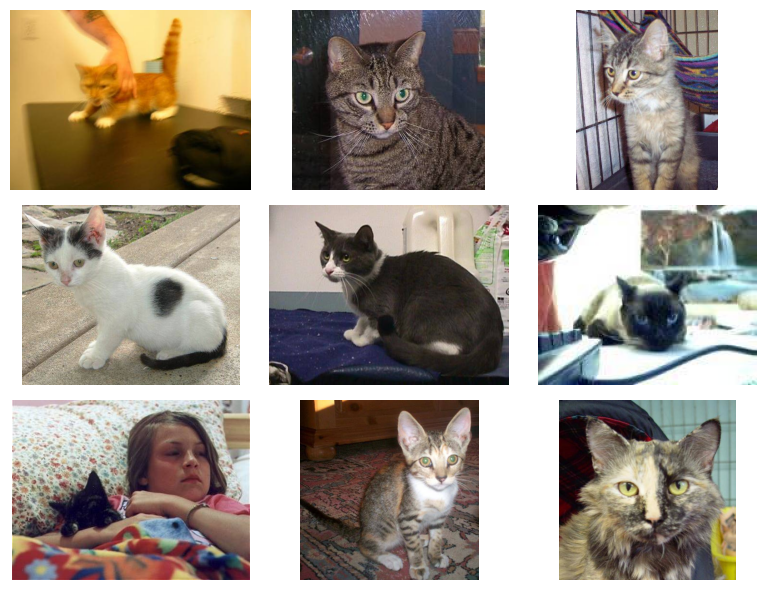

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

# Ruta del archivo de la imagen
base_image_path = '/workspaces/DEEP_LEARNING_Project_21_Julian_Lopez/data/raw/train/'
dog_path = [
    "dog.0.jpg",
    "dog.1.jpg",
    "dog.2.jpg",
    "dog.3.jpg",
    "dog.4.jpg",
    "dog.5.jpg",
    "dog.6.jpg",
    "dog.7.jpg",
    "dog.8.jpg",
]

cat_path = [
    "cat.0.jpg",
    "cat.1.jpg",
    "cat.2.jpg",
    "cat.3.jpg",
    "cat.4.jpg",
    "cat.5.jpg",
    "cat.6.jpg",
    "cat.7.jpg",
    "cat.10.jpg",
]

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos después.
dogs_images = []
for path in dog_path:
    dogs_images.append(f"{base_image_path}/{path}")

cats_images = []
for path in cat_path:
    cats_images.append(f"{base_image_path}/{path}")

# Creo un gráfico con múltiples subgráficos
plt.figure(figsize=(8, 6))

# Cargar y mostrar todas las imágenes
for i, dog_img_path in enumerate(dogs_images):
    img = Image.open(dog_img_path)
    plt.subplot(3, 3, i + 1)  # Dividir en una cuadrícula de 3 filas y 3 columnas
    plt.imshow(img)
    plt.axis('off')  # Desactivar los ejes

plt.tight_layout()
plt.show()

# Creo un gráfico con múltiples subgráficos repitiendo el proceso anterior. 
plt.figure(figsize=(8, 6))

for i, cat_img_path in enumerate(cats_images):
    img = Image.open(cat_img_path)
    plt.subplot(3, 3, + i + 1)  # Dividir en una cuadrícula de 3 filas y 3 columnas
    plt.imshow(img)
    plt.axis('off')  # Desactivar los ejes

plt.tight_layout()
plt.show()

#### Organizar las imágenes de train en subdirectorios

Para cargar las imagenes y luego poder etiquetarlas, necesito que esten separadas por clase, en este caso perro y gato, cada una dentro de su repectiva carpeta dentro del directorio. ( una carpeta para las fotos de perros y otra para las fotos de gatos en train, y lo mismo en test).

Primero organizo las imagenes de train ya que el archivo viene con nombre de la clase y solo tenog que dividirlas por carpetas. 

In [4]:
import os
import shutil

# Ruta de las carpetas
train_folder = '/workspaces/DEEP_LEARNING_Project_21_Julian_Lopez/data/raw/train'
dogs_folder = '/workspaces/DEEP_LEARNING_Project_21_Julian_Lopez/data/raw/train/dogs'
cats_folder = '/workspaces/DEEP_LEARNING_Project_21_Julian_Lopez/data/raw/train/cats'

# Mover las imágenes a las subcarpetas 'cats' y 'dogs' según el nombre del archivo
for filename in os.listdir(train_folder):
    file_path = os.path.join(train_folder, filename)

    # Asegúrate de que solo mueves los archivos y no las carpetas
    if os.path.isfile(file_path):  # Solo mover archivos, no carpetas
        # Mover las imágenes que contienen 'cat' en el nombre a la carpeta 'cats'
        if 'cat' in filename.lower():
            shutil.move(file_path, os.path.join(cats_folder, filename))
        # Mover las imágenes que contienen 'dog' en el nombre a la carpeta 'dogs'
        elif 'dog' in filename.lower():
            shutil.move(file_path, os.path.join(dogs_folder, filename))

print("Las imágenes de 'train' han sido organizadas en subcarpetas 'cats' y 'dogs'.")


Las imágenes de 'train' han sido organizadas en subcarpetas 'cats' y 'dogs'.


#### Cargar las imágenes de train y test. Y redimensionar las imágenes a 200x200 píxeles usando ImageDataGenerator

Aquí paso a cargar las imagenes de train y test y aprovecho para redimencionarlas.

Como se observa al final del bloque, al no tener etiquetas de clase, las imagenes de test no se encuentran, asi que paso a clasificarlas en el siguiente bloque.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el generador para redimensionar las imágenes de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255) # Normalizar las imágenes a [0, 1]

# Crear el generador para los datos de prueba (sin etiquetar aún)
test_datagen = ImageDataGenerator(rescale=1./255) # Normalizar las imágenes a [0, 1]
    
# Ruta de la carpeta de datos de entrenamiento y prueba
train_dir = '/workspaces/DEEP_LEARNING_Project_21_Julian_Lopez/data/raw/train'  
test_dir = '/workspaces/DEEP_LEARNING_Project_21_Julian_Lopez/data/raw/test1'  

# Usar flow_from_directory() para cargar las imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Redimensionar a 200x200 píxeles
    batch_size=32,
    class_mode='binary'  # Ya que es clasificación binaria (gato o perro)
)

# Usar flow_from_directory() para cargar las imágenes de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),  # Redimensionar a 200x200 píxeles
    batch_size=32,
    class_mode=None,  # Las imágenes de test no tienen etiquetas (solo predicción)
    shuffle=False  # No mezclar las imágenes de prueba
)


Found 21531 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


#### Etiquetar las imágenes de test

En este bloque de codigo paso a etiquetar por clase las imagenes de test xon el modelo preentrenado MobileNetV2

In [12]:
import tensorflow as tf
import os
import shutil

# Cargar el modelo preentrenado MobileNetV2 (sin la capa superior)
model = tf.keras.applications.MobileNetV2(weights="imagenet")

# Función para predecir si una imagen es un gato o un perro
def predict_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # MobileNetV2 requiere 224x224
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)  # Agregar dimensión de batch
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocesar la imagen

    predictions = model.predict(img_array)
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]

    # Si la predicción más probable es "cat" o "dog", devolver la etiqueta
    if "cat" in decoded_predictions[0][1].lower():
        return "cats"
    elif "dog" in decoded_predictions[0][1].lower():
        return "dogs"
    return None

# Carpeta de test
test_folder = '/workspaces/DEEP_LEARNING_Project_21_Julian_Lopez/data/raw/test1'  # Aquí van las imágenes de prueba sin nombres

# Crear las carpetas de 'cats' y 'dogs' dentro de 'test'
cats_folder = os.path.join(test_folder, 'cats')
dogs_folder = os.path.join(test_folder, 'dogs')

if not os.path.exists(cats_folder):
    os.makedirs(cats_folder)
if not os.path.exists(dogs_folder):
    os.makedirs(dogs_folder)

# Clasificar las imágenes y moverlas a las carpetas correspondientes
for filename in os.listdir(test_folder):
    img_path = os.path.join(test_folder, filename)
    if os.path.isfile(img_path):
        label = predict_image(img_path)
        if label:
            shutil.move(img_path, os.path.join(test_folder, label, filename))  # Mover la imagen a la carpeta correspondiente

print("Las imágenes de 'test' han sido clasificadas y movidas.")


2025-04-01 11:17:00.017155: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms

KeyboardInterrupt: 

##### Usar flow_from_directory() para cargar las imágenes de prueba ya clasificadas

Como hice un par de bloques mas arriba, utilizo la funcion flow_from_directory() para cargar las imagenes de test, ya ahora con sus dos clases.

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',  # Como estamos haciendo clasificación binaria
    shuffle=False  # No mezclar las imágenes de prueba  
)

NameError: name 'test_datagen' is not defined

En este punto ya tengo mis variables listas para entrenar la red.

In [ ]:
train_generator

test_generator